# merged_stats_n_scorecards

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [5]:
sns.set_palette('Set2')

In [6]:
df = pd.read_csv('data/merged_stats_n_scorecards.csv')

In [7]:
df.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,time_format,referee,details,bout_type,bonus,event_name,event_location,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str,blue_fighter_sig_str,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_total_str,blue_fighter_total_str,red_fighter_TD,blue_fighter_TD,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head,blue_fighter_sig_str_head,red_fighter_sig_str_body,blue_fighter_sig_str_body,red_fighter_sig_str_leg,blue_fighter_sig_str_leg,red_fighter_sig_str_distance,blue_fighter_sig_str_distance,red_fighter_sig_str_clinch,blue_fighter_sig_str_clinch,red_fighter_sig_str_ground,blue_fighter_sig_str_ground,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,5 Rnd (5-5-5-5-5),Marc Goddard,Punch to Head At Distance,UFC Featherweight Title Bout,belt,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1,0,75 of 144,79 of 204,52,38,78 of 147,84 of 209,2 of 2,0 of 0,100,---,0,0,0,0,0:45,0:00,49 of 114,47 of 151,11 of 14,13 of 30,15 of 16,19 of 23,71 of 140,79 of 204,0 of 0,0 of 0,4 of 4,0 of 0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,5 Rnd (5-5-5-5-5),Jason Herzog,Rear Naked Choke,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,0,2 of 2,3 of 4,100,75,2 of 2,25 of 31,0 of 0,2 of 4,---,50,0,1,0,0,0:00,3:20,0 of 0,2 of 3,0 of 0,1 of 1,2 of 2,0 of 0,2 of 2,0 of 1,0 of 0,0 of 0,0 of 0,3 of 3,0,66,0,33,100,0,100,0,0,0,0,100,- - -,- - -
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Vitor Ribeiro,Sal D'amato 28 - 29. Jacob Montalvo 28 - 29. T...,Light Heavyweight Bout,-,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,0,55 of 114,53 of 117,48,45,75 of 142,59 of 123,0 of 0,0 of 1,---,0,0,0,0,0,1:31,1:00,20 of 72,10 of 65,22 of 29,9 of 12,13 of 13,34 of 40,50 of 105,50 of 111,5 of 9,3 of 6,0 of 0,0 of 0,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,Mike Bell 28 - 29. Ben Cartlidge 28 - 29. Hadi...,Featherweight Bout,-,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,1,52 of 100,46 of 106,52,43,78 of 133,52 of 116,3 of 5,1 of 3,60,33,0,0,0,2,2:17,4:47,36 of 77,35 of 92,12 of 17,5 of 8,4 of 6,6 of 6,37 of 80,32 of 79,12 of 16,6 of 16,3 of 4,8 of 11,69,76,23,10,7,13,71,69,23,13,5,17,29 29 29,28 28 28
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,3 Rnd (5-5-5),Kerry Hatley,Spinning Back Fist Head,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1,0,65 of 106,77 of 140,61,55,67 of 108,77 of 141,0 of 0,0 of 0,---,---,0,0,0,0,0:02,0:21,24 of 53,22 of 66,29 of 34,10 of 14,12 of 19,45 of 60,63 of 104,75 of 138,2 of 2,2 of 2,0 of 0,0 of 0,36,28,44,12,18,58,96,97,3,2,0,0,10 10 10,9 9 9


In [8]:
df.shape

(7756, 61)

In [9]:
list(df.columns.sort_values())

['blue_fighter_KD',
 'blue_fighter_TD',
 'blue_fighter_TD_pct',
 'blue_fighter_ctrl',
 'blue_fighter_name',
 'blue_fighter_nickname',
 'blue_fighter_result',
 'blue_fighter_rev',
 'blue_fighter_sig_str',
 'blue_fighter_sig_str_body',
 'blue_fighter_sig_str_body_pct',
 'blue_fighter_sig_str_clinch',
 'blue_fighter_sig_str_clinch_pct',
 'blue_fighter_sig_str_distance',
 'blue_fighter_sig_str_distance_pct',
 'blue_fighter_sig_str_ground',
 'blue_fighter_sig_str_ground_pct',
 'blue_fighter_sig_str_head',
 'blue_fighter_sig_str_head_pct',
 'blue_fighter_sig_str_leg',
 'blue_fighter_sig_str_leg_pct',
 'blue_fighter_sig_str_pct',
 'blue_fighter_sub_att',
 'blue_fighter_total_pts',
 'blue_fighter_total_str',
 'bonus',
 'bout_type',
 'details',
 'event_date',
 'event_location',
 'event_name',
 'method',
 'red_fighter_KD',
 'red_fighter_TD',
 'red_fighter_TD_pct',
 'red_fighter_ctrl',
 'red_fighter_name',
 'red_fighter_nickname',
 'red_fighter_result',
 'red_fighter_rev',
 'red_fighter_sig_str',

In [12]:
df.drop(
    columns = [
        'blue_fighter_nickname',
        'red_fighter_nickname',
        'bonus',
        'referee'
    ],
    inplace = True
)

In [10]:
df['method']

0                        KO/TKO
1                    Submission
2          Decision - Unanimous
3          Decision - Unanimous
4                        KO/TKO
5                        KO/TKO
6                        KO/TKO
7              Decision - Split
8                    Submission
9                        KO/TKO
10         Decision - Unanimous
11         Decision - Unanimous
12         Decision - Unanimous
13                       KO/TKO
14         Decision - Unanimous
15         Decision - Unanimous
16         Decision - Unanimous
17         Decision - Unanimous
18         Decision - Unanimous
19         Decision - Unanimous
20                   Submission
21         Decision - Unanimous
22         Decision - Unanimous
23         Decision - Unanimous
24             Decision - Split
25             Decision - Split
26         Decision - Unanimous
27                       KO/TKO
28             Decision - Split
29                       KO/TKO
30                   Submission
31      

<Axes: xlabel='blue_fighter_KD'>

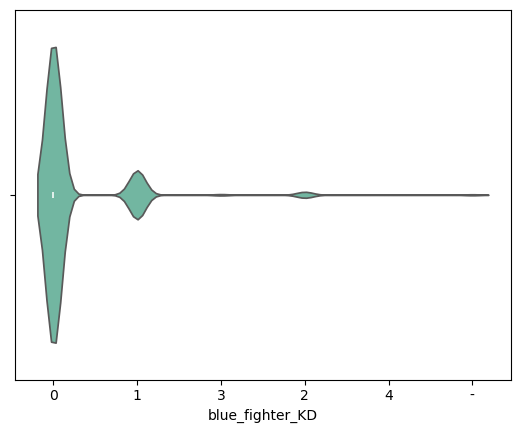

In [11]:
sns.violinplot(data=df, x='blue_fighter_KD')